In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Kostic Colorectal Cancer

## GG97 OTU

In [2]:
task = 'Kostic Colorectal Cancer Healthy/Tumor GG97 OTU'
folder = 'kostic-tumorv2'

In [3]:
num_features = 3231
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/kostic_gg_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/kostic_gg_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/kostic_gg_exp3/best_test.csv', sep=';') # NoRel+CLR

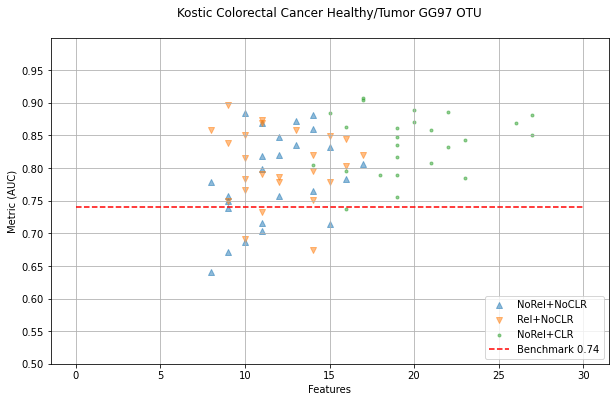

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.74, filename='./plotsv2/kostic_tumor_gg97_otu.png', xmax=30, ylim=(0.5, 1))

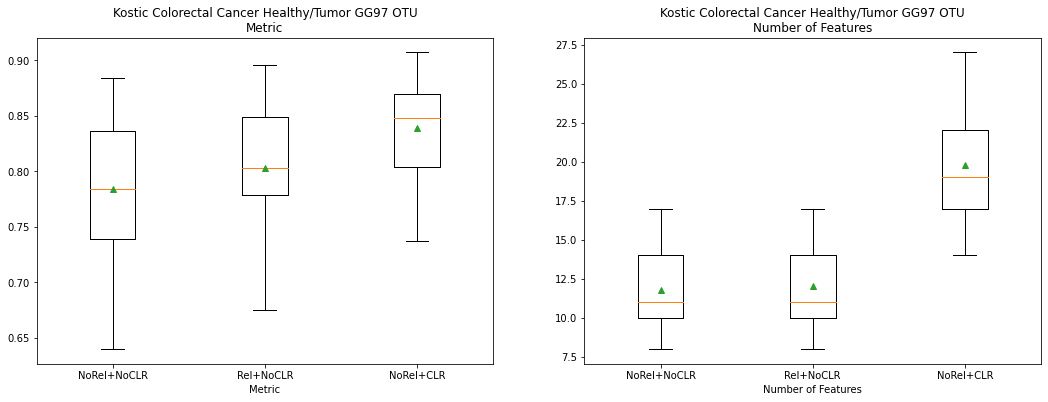

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, title=task, filename='./plotsv2/kostic_tumor_boxplot_gg97_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
11,6,14,0.882,0.878,"[194, 251, 264, 710, 1043, 1368, 2096, 2100, 2...",0.878,0.878,"[0.941, 0.875, 0.905, 0.919, 0.926, 0.907, 0.8...",0.869,0.735,0.957,0.048
19,11,11,0.869,0.866,"[62, 264, 776, 981, 1116, 1892, 2095, 2200, 24...",0.866,0.866,"[0.908, 0.817, 0.825, 0.865, 0.87, 0.83, 0.879...",0.854,0.758,0.953,0.045
13,7,12,0.848,0.844,"[194, 264, 817, 1143, 1531, 1812, 2095, 2261, ...",0.844,0.844,"[0.884, 0.863, 0.803, 0.978, 0.676, 0.851, 0.8...",0.851,0.676,0.983,0.056
32,20,13,0.836,0.832,"[264, 265, 1002, 1192, 1240, 1328, 1914, 2101,...",0.832,0.832,"[0.858, 0.946, 0.808, 0.789, 0.846, 0.881, 0.8...",0.838,0.687,0.965,0.061
26,15,15,0.832,0.827,"[137, 264, 272, 500, 969, 1138, 1921, 2045, 23...",0.827,0.827,"[0.768, 0.881, 0.618, 0.872, 0.874, 0.751, 0.8...",0.836,0.618,0.976,0.055


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
13,10,13,0.858,0.854,"[264, 500, 924, 1379, 1892, 1924, 2042, 2084, ...",0.854,0.854,"[0.768, 0.782, 0.813, 0.9, 0.875, 0.827, 0.917...",0.863,0.723,0.969,0.051
5,4,17,0.820,0.815,"[6, 996, 1008, 1269, 1334, 1349, 1655, 1731, 1...",0.815,0.815,"[0.858, 0.766, 0.834, 0.886, 0.749, 0.836, 0.8...",0.856,0.607,0.953,0.058
9,7,8,0.858,0.856,"[194, 311, 338, 986, 2338, 2430, 2559, 2879]",0.856,0.856,"[0.818, 0.913, 0.785, 0.898, 0.865, 0.92, 0.91...",0.847,0.706,0.964,0.060
0,0,10,0.815,0.812,"[1, 234, 264, 927, 1222, 1379, 1655, 2200, 235...",0.812,0.812,"[0.711, 0.824, 0.863, 0.898, 0.73, 0.801, 0.80...",0.843,0.668,0.965,0.055
32,23,9,0.839,0.836,"[80, 194, 697, 1009, 1937, 1968, 2295, 2559, 2...",0.836,0.836,"[0.875, 0.749, 0.798, 0.792, 0.858, 0.846, 0.8...",0.838,0.718,0.939,0.051


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
18,13,17,0.905,0.900,"[168, 194, 264, 697, 767, 1011, 1119, 1450, 16...",0.900,0.900,"[0.891, 0.965, 0.694, 0.777, 0.865, 0.913, 0.9...",0.866,0.694,0.978,0.061
2,2,19,0.862,0.856,"[55, 174, 194, 664, 719, 814, 1139, 1379, 1505...",0.856,0.856,"[0.772, 0.875, 0.804, 0.92, 0.841, 0.877, 0.82...",0.850,0.696,0.978,0.057
33,24,19,0.817,0.811,"[62, 163, 194, 220, 264, 268, 462, 738, 967, 1...",0.811,0.811,"[0.81, 0.796, 0.83, 0.889, 0.917, 0.763, 0.834...",0.841,0.673,0.976,0.065
26,19,22,0.886,0.879,"[58, 66, 172, 194, 265, 543, 882, 1075, 1319, ...",0.879,0.879,"[0.834, 0.804, 0.813, 0.768, 0.872, 0.817, 0.8...",0.821,0.706,0.936,0.045
17,12,19,0.836,0.830,"[155, 194, 275, 431, 639, 736, 786, 944, 1171,...",0.830,0.830,"[0.763, 0.81, 0.799, 0.867, 0.737, 0.756, 0.85...",0.820,0.631,0.926,0.060


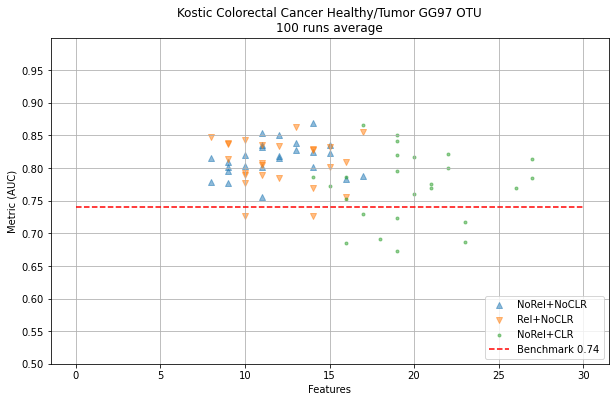

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.74, filename='./plotsv2/kostic_tumor_gg97_otu_avg_n.png', xmax=30, ylim=(0.5, 1))

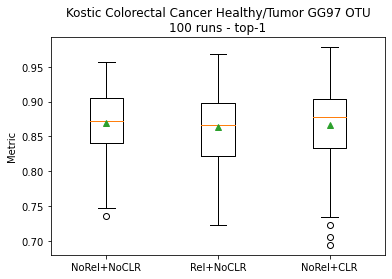

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/kostic_tumor_boxplot_nruns_top1_gg97_otu.png')

---

In [23]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [24]:
folder = 'kostic-tumorv2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [25]:
config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (172, 3231)
Final dataset shape: (172, 3231)
Final dataset shape: (172, 3231)


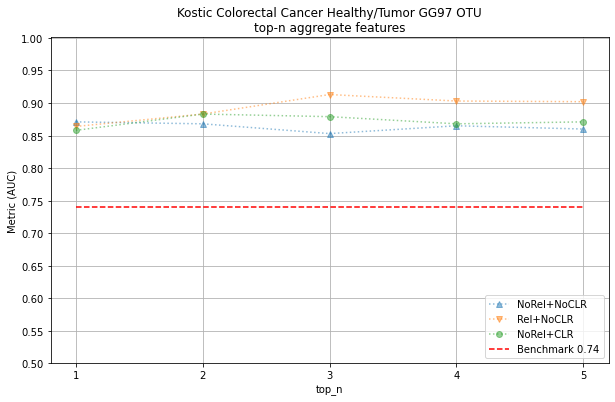

In [26]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.74, filename='./plotsv2/kostic_tumor_nruns_topn_gg97_otu.png', xmax=(top_n-1), ylim=(0.5, 1.001), top_n=top_n)

In [27]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.871, 0.868, 0.853, 0.865, 0.86], 'Rel+NoCLR': [0.864, 0.883, 0.913, 0.903, 0.902], 'NoRel+CLR': [0.858, 0.883, 0.879, 0.868, 0.871]}
{'NoRel+NoCLR': [14, 24, 31, 42, 53], 'Rel+NoCLR': [13, 29, 36, 42, 49], 'NoRel+CLR': [17, 34, 50, 70, 88]}


---

In [28]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [36]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        187780      0.0491    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__']
        953855      0.0612    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
        372348      0.0801    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__']
        969149      0.0828    ['k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__Citrobacter; s__']
       1517779      0.0846    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
        179585      0.0952    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__']
        276149      0.1067    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Parabacteroides; 

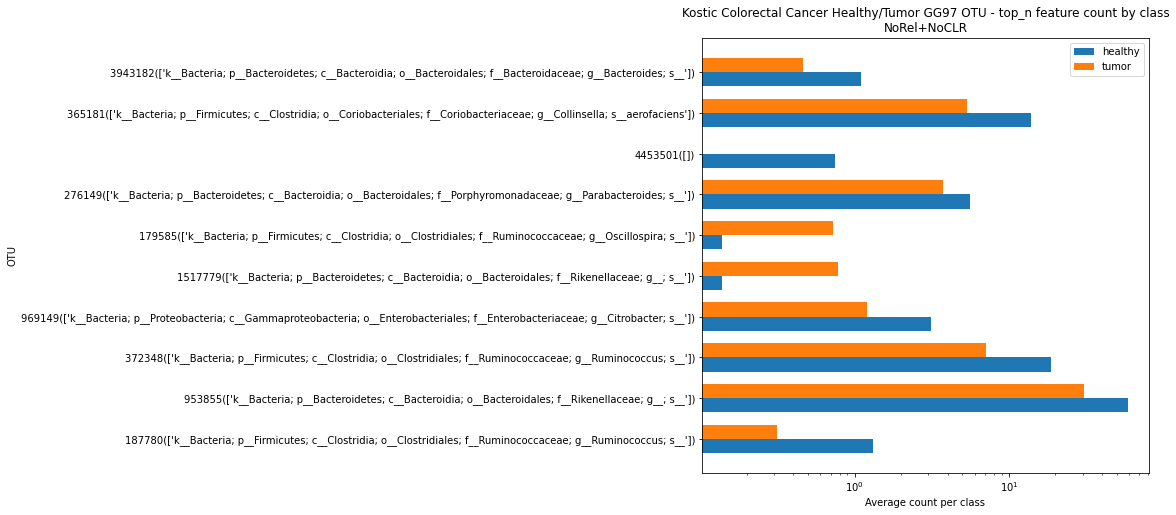

In [37]:
features = data1.features[top_n_features]
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,8), filename=filename)

In [31]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        197105      0.0137    ['k__Bacteria; p__Firmicutes; c__Erysipelotrichi; o__Erysipelotrichales; f__Erysipelotrichaceae; g__[Eubacterium]; s__biforme']
       3350931      0.0259    ['k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pasteurellales; f__Pasteurellaceae; g__Haemophilus; s__parainfluenzae']
        24210       0.0268    ['k__Bacteria; p__Spirochaetes; c__Spirochaetes; o__Spirochaetales; f__Spirochaetaceae; g__Treponema; s__socranskii']
       4336943      0.0419    []
        412392      0.0433    ['k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Comamonadaceae; g__; s__']
        179585      0.0435    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__']
       4030375      0.0441    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__']
        362765      0.0509    ['k__Bacteri

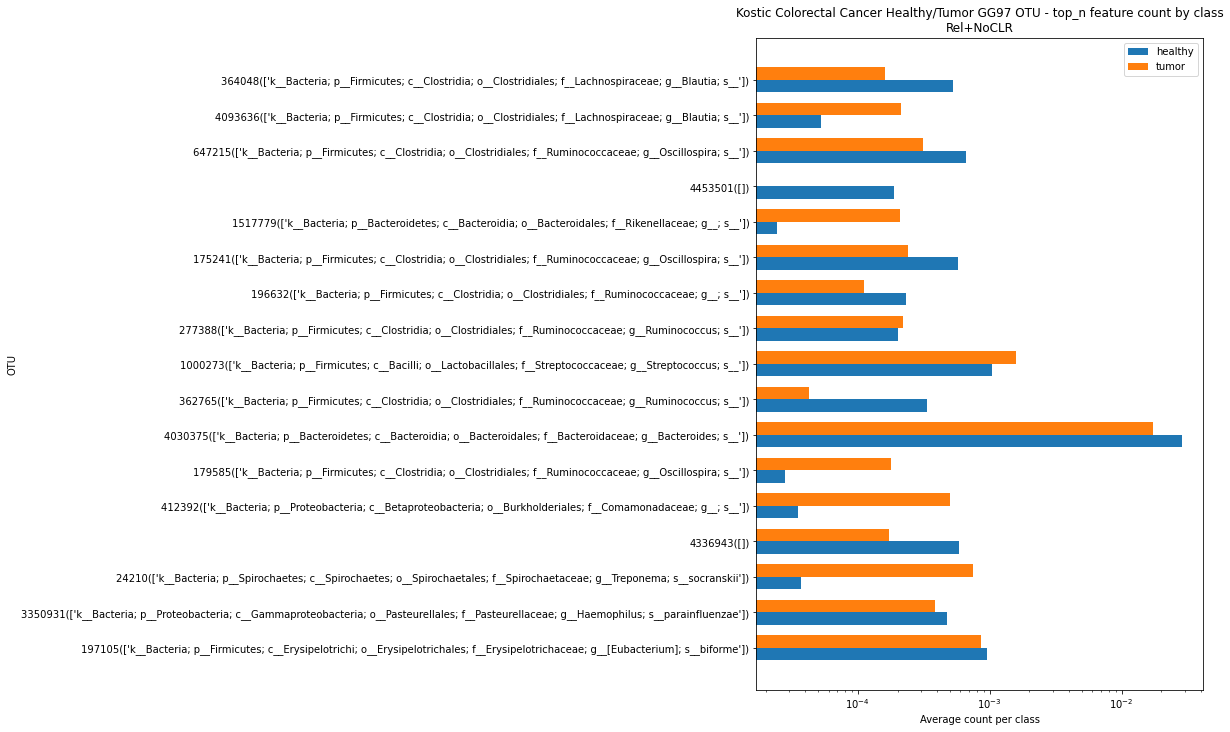

In [32]:
features = data2.features[top_n_features]
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,12), filename=filename)

In [33]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        187492      0.0256    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__']
       1517779      0.0292    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
       4425526      0.0462    []
       3765807      0.0554    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__']
        179585      0.0627    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__']
        363358      0.0634    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__']
        828676      0.071     []
        187404      0.0716    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__']
        277388      0.0755    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__']
        81

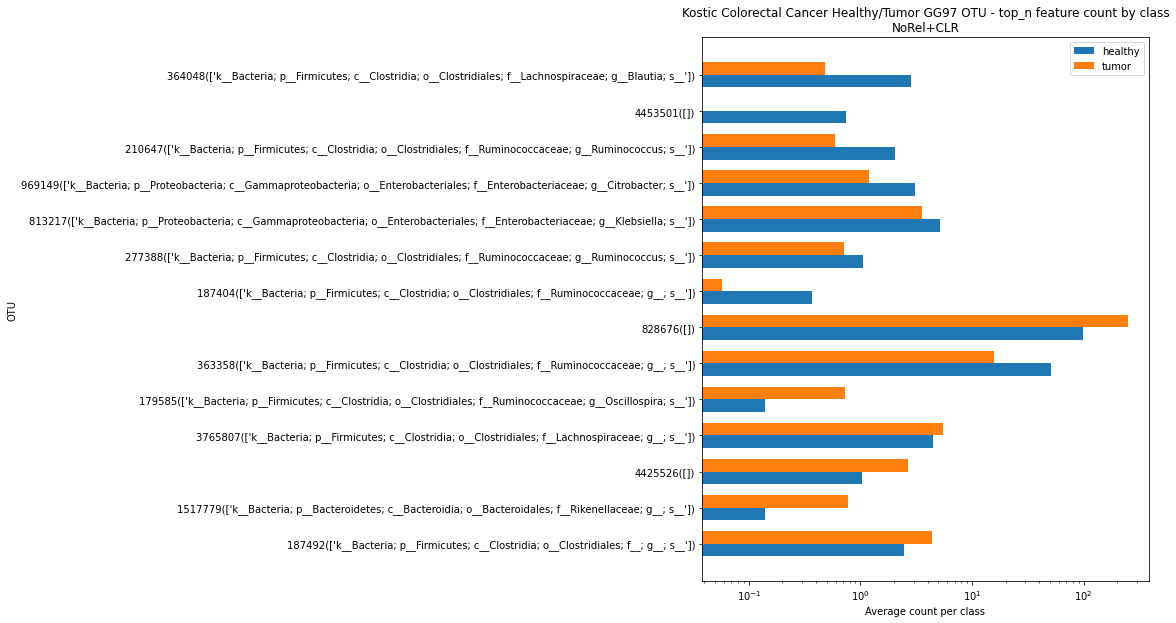

In [34]:
features = data3.features[top_n_features]
filename = f'./plotsv2/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,10), filename=filename)